In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Exercise 1

### Determine PCA of a 3x2 matrix

#### define a matrix

In [ ]:
A = np.array([[1, 2], [3, 4], [5, 6]])
print(A)

[[1 2]
 [3 4]
 [5 6]]


#### First do it manually!

#### 1. Subtract the mean of each variable

In [ ]:
mean = np.mean(A, axis=0)
centered_data = A-mean
print(centered_data)

[[-2. -2.]
 [ 0.  0.]
 [ 2.  2.]]


#### 2. Calculate the Covariance Matrix

In [ ]:
covariance = np.cov(centered_data, rowvar=False)
covariance

array([[4., 4.],
       [4., 4.]])

#### 3. Compute the Eigenvalues and Eigenvectors

In [ ]:
eigen_values, eigen_vector = np.linalg.eig(covariance)
print(eigen_values, eigen_vector)
print(eigen_vector.T)

[8. 0.] [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


#### 4. project data of the original matrix to the new basis

In [ ]:
projected_data = np.dot(centered_data, eigen_vector[0])
projected_data

array([0., 0., 0.])

#### conclusion?

In [ ]:
"""
It shows that data points in the original space are collinear with the new basis.
Thus no variance in the data along the direction of the new basis vectors.
This shows redundancy in the original data

"""

'\nIt shows that data points in the original space are collinear with the new basis.\nThus no variance in the data along the direction of the new basis vectors.\nThis shows redundancy in the original data\n\n'

# Exercise 2

### Ok Let's do it again but for a larger matrix 20x5

#### Generate a dummy dataset.

In [ ]:
X = np.random.randint(10,50,100).reshape(20,5)
print(X)

[[27 24 31 45 43]
 [15 34 22 26 34]
 [12 23 41 15 14]
 [12 38 14 38 40]
 [35 23 34 21 15]
 [48 34 33 13 30]
 [48 21 38 33 27]
 [29 11 30 34 39]
 [19 27 44 26 31]
 [11 14 49 11 20]
 [47 13 19 35 33]
 [27 14 27 48 48]
 [44 35 49 22 48]
 [40 33 26 19 20]
 [19 48 32 38 43]
 [30 21 30 31 39]
 [45 31 38 40 29]
 [13 28 41 11 16]
 [47 38 23 12 41]
 [20 43 24 24 10]]


#### 1. Subtract the mean of each variable

Subtract the mean of each variable from the dataset so that the dataset should be centered on the origin. Doing this proves to be very helpful when calculating the covariance matrix.

In [ ]:
mean2 = np.mean(X, axis = 0)
centered_data = X-mean2
print(centered_data, centered_data[0])

[[ -2.4   -3.65  -1.25  17.9   12.  ]
 [-14.4    6.35 -10.25  -1.1    3.  ]
 [-17.4   -4.65   8.75 -12.1  -17.  ]
 [-17.4   10.35 -18.25  10.9    9.  ]
 [  5.6   -4.65   1.75  -6.1  -16.  ]
 [ 18.6    6.35   0.75 -14.1   -1.  ]
 [ 18.6   -6.65   5.75   5.9   -4.  ]
 [ -0.4  -16.65  -2.25   6.9    8.  ]
 [-10.4   -0.65  11.75  -1.1    0.  ]
 [-18.4  -13.65  16.75 -16.1  -11.  ]
 [ 17.6  -14.65 -13.25   7.9    2.  ]
 [ -2.4  -13.65  -5.25  20.9   17.  ]
 [ 14.6    7.35  16.75  -5.1   17.  ]
 [ 10.6    5.35  -6.25  -8.1  -11.  ]
 [-10.4   20.35  -0.25  10.9   12.  ]
 [  0.6   -6.65  -2.25   3.9    8.  ]
 [ 15.6    3.35   5.75  12.9   -2.  ]
 [-16.4    0.35   8.75 -16.1  -15.  ]
 [ 17.6   10.35  -9.25 -15.1   10.  ]
 [ -9.4   15.35  -8.25  -3.1  -21.  ]] [-2.4  -3.65 -1.25 17.9  12.  ]


#### 2. Calculate the Covariance Matrix

Calculate the Covariance Matrix of the mean-centered data.

In [ ]:
covariance = np.cov(centered_data, rowvar=False)
print(covariance)
np.allclose(covariance, covariance.T)

[[192.04210526  -7.43157895  -8.57894737   8.32631579  35.68421053]
 [ -7.43157895 107.81842105 -19.22368421 -18.43684211   1.26315789]
 [ -8.57894737 -19.22368421  93.03947368 -40.18421053 -24.10526316]
 [  8.32631579 -18.43684211 -40.18421053 134.41052632  79.        ]
 [ 35.68421053   1.26315789 -24.10526316  79.         140.10526316]]


True

Note: the matrix is symmetrical

#### 3. Compute the Eigenvalues and Eigenvectors

Now, compute the Eigenvalues and Eigenvectors for the calculated Covariance matrix.

In [ ]:
eigen_values1, eigen_vector1= np.linalg.eig(covariance)
print(eigen_values1, eigen_vector1)

[250.23395921 176.57829899  42.55113241  78.0986625  119.95373637] [[-0.5002038   0.85069501  0.1190108   0.09654425  0.05128154]
 [ 0.05766069 -0.0349338   0.34329604 -0.28981423  0.89084815]
 [ 0.25547141  0.1937223   0.4527302  -0.71966218 -0.41752573]
 [-0.55217929 -0.43029172  0.66286155  0.2039169  -0.17023374]
 [-0.61343605 -0.2289505  -0.47289977 -0.5892293   0.02127255]]


Note: The Eigenvectors of the Covariance matrix we get are Orthogonal to each other and each vector represents a principal axis.
A Higher Eigenvalue corresponds to a higher variability. Hence the principal axis with the higher Eigenvalue will be an axis capturing higher variability in the data.

#### 4. Sort Eigenvalues in descending order

Sort the Eigenvalues in the descending order along with their corresponding Eigenvector.

In [ ]:
# dic = {}
# for i in range(len(eigen_values1)):
#   dic.update({eigen_values1[i]: eigen_vector1.T[i]})
# eigen_values1.sort()
# eigen_values1
# dic
sorted_ev = np.argsort(eigen_values1)
sorted_evr = eigen_vector1[sorted_ev]
sorted_evr.shape

(5, 5)

Note: Each column in the Eigen vector-matrix corresponds to a principal component, so arranging them in descending order of their Eigenvalue will automatically arrange the principal component in descending order of their variability.
Hence the first column in our rearranged Eigen vector-matrix will be a principal component that captures the highest variability.

#### 5. Select a subset from the rearranged Eigenvalue matrix

Select a subset of n first eigenvectors from the rearranged Eigenvector matrix as per our need, n is desired dimension of your final reduced data. i.e. "n_components=2" means you selected the first two principal components.

In [ ]:
n_components = 2
subset_evr = sorted_evr[:, : n_components]
subset_evr.shape

(5, 2)

Note: The final dimensions of X_reduced will be ( 20, 2 ) and originally the data was of higher dimensions ( 20, 5 ).

#### 6. Transform the data

Finally, transform the data by having a dot product between the Transpose of the Eigenvector subset and the Transpose of the mean-centered data. By transposing the outcome of the dot product, the result we get is the data reduced to lower dimensions from higher dimensions.

In [ ]:
final_data = np.dot(centered_data, subset_evr)
final_data.shape

(20, 2)

# Exercise 3

### Now, let’s just combine everything above by making a function and try our Principal Component analysis from scratch on an example.

#### Create a PCA function accepting data matrix and the number of components as input arguments.

In [ ]:
def PCA(data_matrix, no_of_components):
  centered = data_matrix - np.mean(data_matrix, axis=0)
  covariance_data = np.cov(centered, rowvar=False)
  if np.allclose(covariance_data, covariance_data.T)==False:
    raise exception("Not symmetric covariance")
  ev, evector = np.linalg.eig(covariance_data)
  sorted_evector = evector[np.argsort(ev)] #Trying direct, missing a step
  subset_evector = sorted_evector[:, :no_of_components]
  final = np.dot(centered, subset_evector)
  return final

#### Let's use the IRIS dataset to test our PCA function, and by the same way see if we can classify the dataset in the projected space

In [ ]:
#Get the IRIS dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
data.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### 1. prepare the dataset & target set for classification

In [ ]:
X1= data.iloc[:, :-1]
Y1= data["target"]
X1

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#### 2. Apply the PCA function

In [ ]:
after_pca= PCA(X1, 2)

#### 3. Create a Pandas Dataframe of reduced Dataset with target data

In [ ]:
df = pd.DataFrame(data=np.c_[after_pca, Y1], columns=[f'PC{i}' for i in range(1, 3)]+['Target'])
df

,PC1,PC2,Target
0,-0.051772,2.399673,Iris-setosa
1,-0.551827,2.296848,Iris-setosa
2,-0.444054,2.390032,Iris-setosa
3,-0.58205,2.219042,Iris-setosa
4,-0.001999,2.409779,Iris-setosa
...,...,...,...
145,0.540809,-1.720321,Iris-virginica
146,-0.159197,-1.429529,Iris-virginica
147,0.360563,-1.5383,Iris-virginica
148,0.687562,-1.83331,Iris-virginica


#### 4. Vizualize the data with one and two principal components

Text(0.5, 1.0, 'Iris dataset with two principal components')

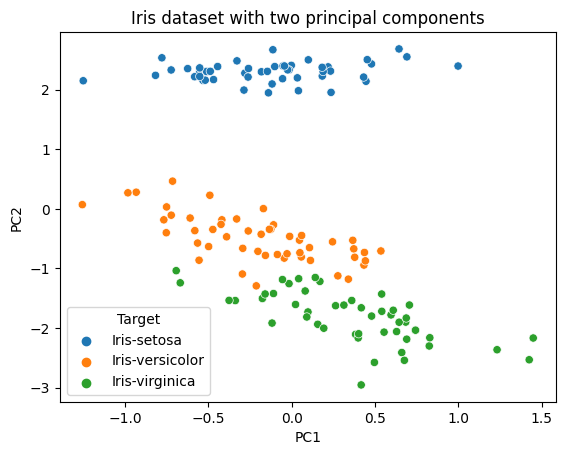

In [ ]:
import seaborn as sns
# c1= df['PC1']
# c2= df['PC2']

sns.scatterplot(data=df, x= "PC1", y= "PC2", hue="Target")
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.title('Iris dataset with two principal components')

conclusions?

The dimensions are indeed reduced, creating a beautiful looking graph with PCA1 and PCA2 axis. There is a slight overlap in Iris-versicolor and Iris-virginia. One can perform further analysis and find new insights from the dataset.
The data is spread in cluster format with few outliers.

# More?

### Go to: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html